#About Dataset:


In [1]:
#First I load the libraries that we need:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
#We load the dataset and then split it into train and test parts
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# I want to rescale the image values so that they lie in between 0 and 1.
train_images= train_images/255.
test_images=test_images/255.

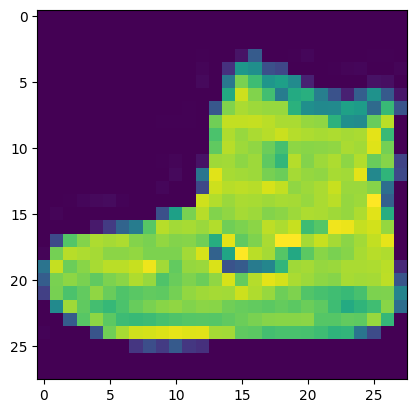

labels: Ankle boot


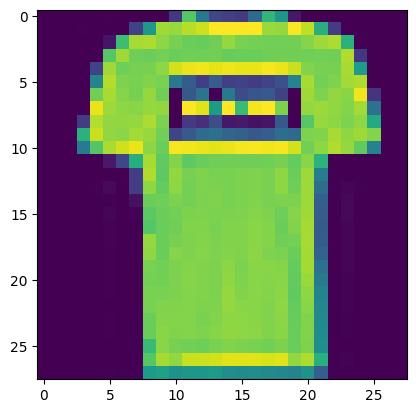

labels: T-shirt/top


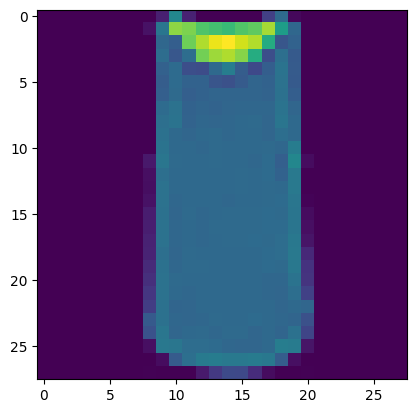

labels: T-shirt/top


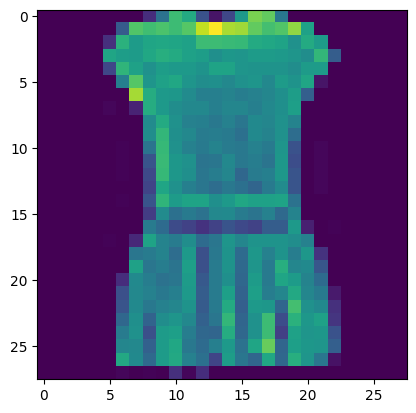

labels: Dress


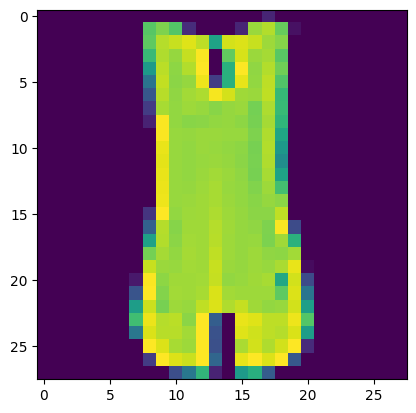

labels: T-shirt/top


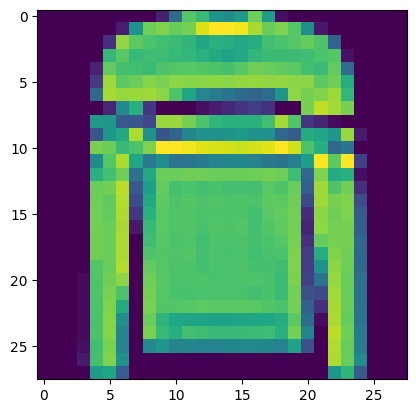

labels: Pullover


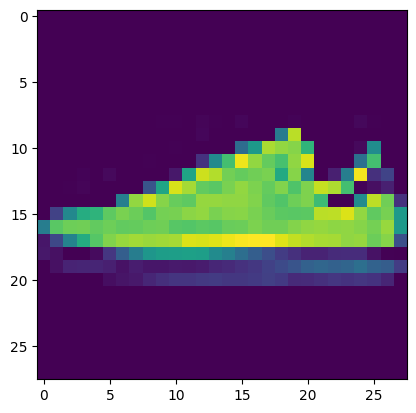

labels: Sneaker


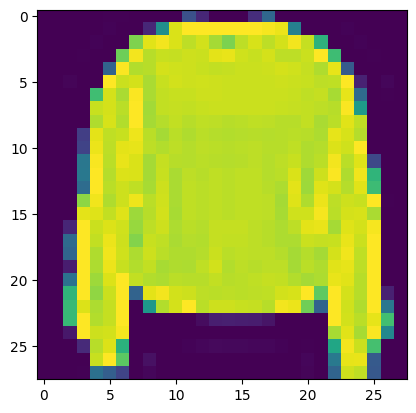

labels: Pullover


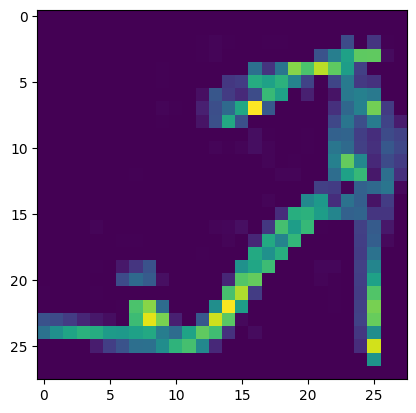

labels: Sandal


In [4]:
#the dataset has 10 classes and I've written this code to display the classes
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
i=0
for i in range(0,9):
  img=train_images[i,:,:]
  plt.imshow(img)
  plt.show()
  print(f'labels: {labels[train_labels[i]]}')

In [5]:
#Here is the model that I've used for the dataset, I've also used dropout to avoid overfitting
model= Sequential([
    Conv2D(50,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Conv2D(40,(5,5), activation='relu'),
    MaxPooling2D(3,3),
    Dense(64,activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
#Let's see the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 50)         0         
 )                                                               
                                                                 
 dense (Dense)               (None, 8, 8, 128)         6528      
                                                                 
 dropout (Dropout)           (None, 8, 8, 128)         0         
                                                                 
 dense_1 (Dense)             (None, 8, 8, 128)         16512     
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 40)          128040    
                                                        

In [7]:
#We compile the model using the adam optimizer, the sparse categorical crossentropy for the loss function and accuracy as our metric
model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= 'accuracy')

In [8]:
#I fit the model and run it for 20 epochs, I also use the validation split to check for overfitting
history= model.fit(train_images, train_labels, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 23s 10ms/step - loss: 0.8279 - accuracy: 0.6819 - val_loss: 0.5063 - val_accuracy: 0.8068
Epoch 2/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5386 - accuracy: 0.8051 - val_loss: 0.4386 - val_accuracy: 0.8322
Epoch 3/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4676 - accuracy: 0.8310 - val_loss: 0.4037 - val_accuracy: 0.8478
Epoch 4/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4241 - accuracy: 0.8485 - val_loss: 0.3510 - val_accuracy: 0.8687
Epoch 5/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3936 - accuracy: 0.8576 - val_loss: 0.3352 - val_accuracy: 0.8797
Epoch 6/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3736 - accuracy: 0.8654 - val_loss: 0.3358 - val_accuracy: 0.8823
Epoch 7/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3578 - accuracy: 0.8723 - val_loss: 0.3097 - val_a

In [9]:
#I use the Pandas library to creat a data fram from the model's history so that the details of the model's performance on every epoch can be seen
df= pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.827881,0.681889,0.506334,0.806833
1,0.538565,0.805074,0.438574,0.832167
2,0.467648,0.830981,0.403709,0.847833
3,0.424083,0.848463,0.350975,0.868667
4,0.393600,0.857574,0.335244,0.879667
5,0.373574,0.865352,0.335801,0.882333
6,0.357804,0.872278,0.309717,0.888333
7,0.347469,0.876667,0.319603,0.881667
8,0.335607,0.879537,0.307734,0.887500
9,0.327560,0.883241,0.320142,0.885000


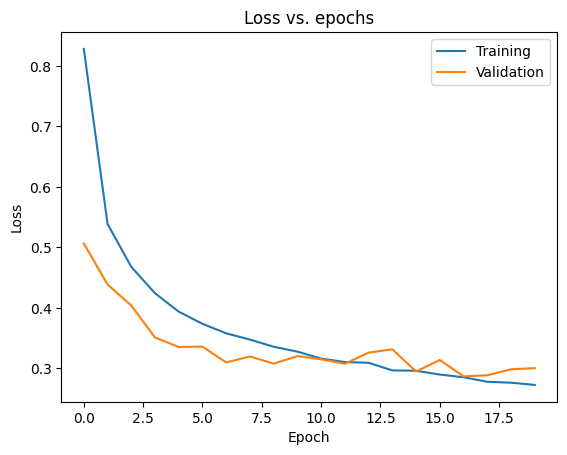

In [10]:
# I plotted the loss for both training and validation to make sure we have avoided overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

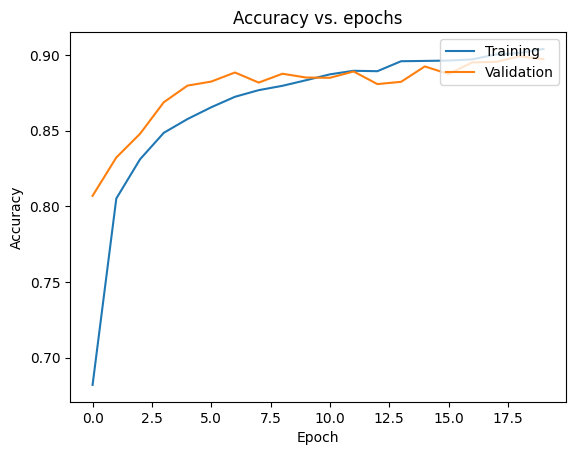

In [11]:
# I've also done the same with accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
#Finally I evaluate the perfomance of our model on the test set:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3236 - accuracy: 0.8892


[0.32361090183258057, 0.88919997215271]